Sanvicente Perez Angel David

5AV1

Ciencia de datos

7 de noviembre 2024

En este codigo lo que se hace es reducir la dimensionalidad de un dataset  de analisi de cancer de wisconcin. Para su correcto funcionamiento se deben descargar las librerias necesarias ya que la carga dedatos se hece mediante la llamada a una funcion de la libreria ucimlrepo

El codigo se divide en 4 secciones generales y estan ordenados lo que quiere decir es que para su correcto funcionaiento se debe ejecutar las celdas en orden

# instalacion de librerias necesarias y carga de datos


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

In [4]:
breast_cancer_wisconsin_diagnostic

{'data': {'ids':            ID
  0      842302
  1      842517
  2    84300903
  3    84348301
  4    84358402
  ..        ...
  564    926424
  565    926682
  566    926954
  567    927241
  568     92751
  
  [569 rows x 1 columns],
  'features':      radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
  0      17.99     10.38      122.80  1001.0      0.11840       0.27760   
  1      20.57     17.77      132.90  1326.0      0.08474       0.07864   
  2      19.69     21.25      130.00  1203.0      0.10960       0.15990   
  3      11.42     20.38       77.58   386.1      0.14250       0.28390   
  4      20.29     14.34      135.10  1297.0      0.10030       0.13280   
  ..       ...       ...         ...     ...          ...           ...   
  564    21.56     22.39      142.00  1479.0      0.11100       0.11590   
  565    20.13     28.25      131.20  1261.0      0.09780       0.10340   
  566    16.60     28.08      108.30   858.1      0.08455       0.10230   
  

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)
y = le.transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [16]:
features=X.columns
features

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')

#1. Visualización inicial de datos y transformación de los mismos

In [5]:
#calcular la varianza de cada dimension
varianzas = X.var()
print(varianzas)

radius1                   12.418920
texture1                  18.498909
perimeter1               590.440480
area1                 123843.554318
smoothness1                0.000198
compactness1               0.002789
concavity1                 0.006355
concave_points1            0.001506
symmetry1                  0.000752
fractal_dimension1         0.000050
radius2                    0.076902
texture2                   0.304316
perimeter2                 4.087896
area2                   2069.431583
smoothness2                0.000009
compactness2               0.000321
concavity2                 0.000911
concave_points2            0.000038
symmetry2                  0.000068
fractal_dimension2         0.000007
radius3                   23.360224
texture3                  37.776483
perimeter3              1129.130847
area3                 324167.385102
smoothness3                0.000521
compactness3               0.024755
concavity3                 0.043524
concave_points3            0

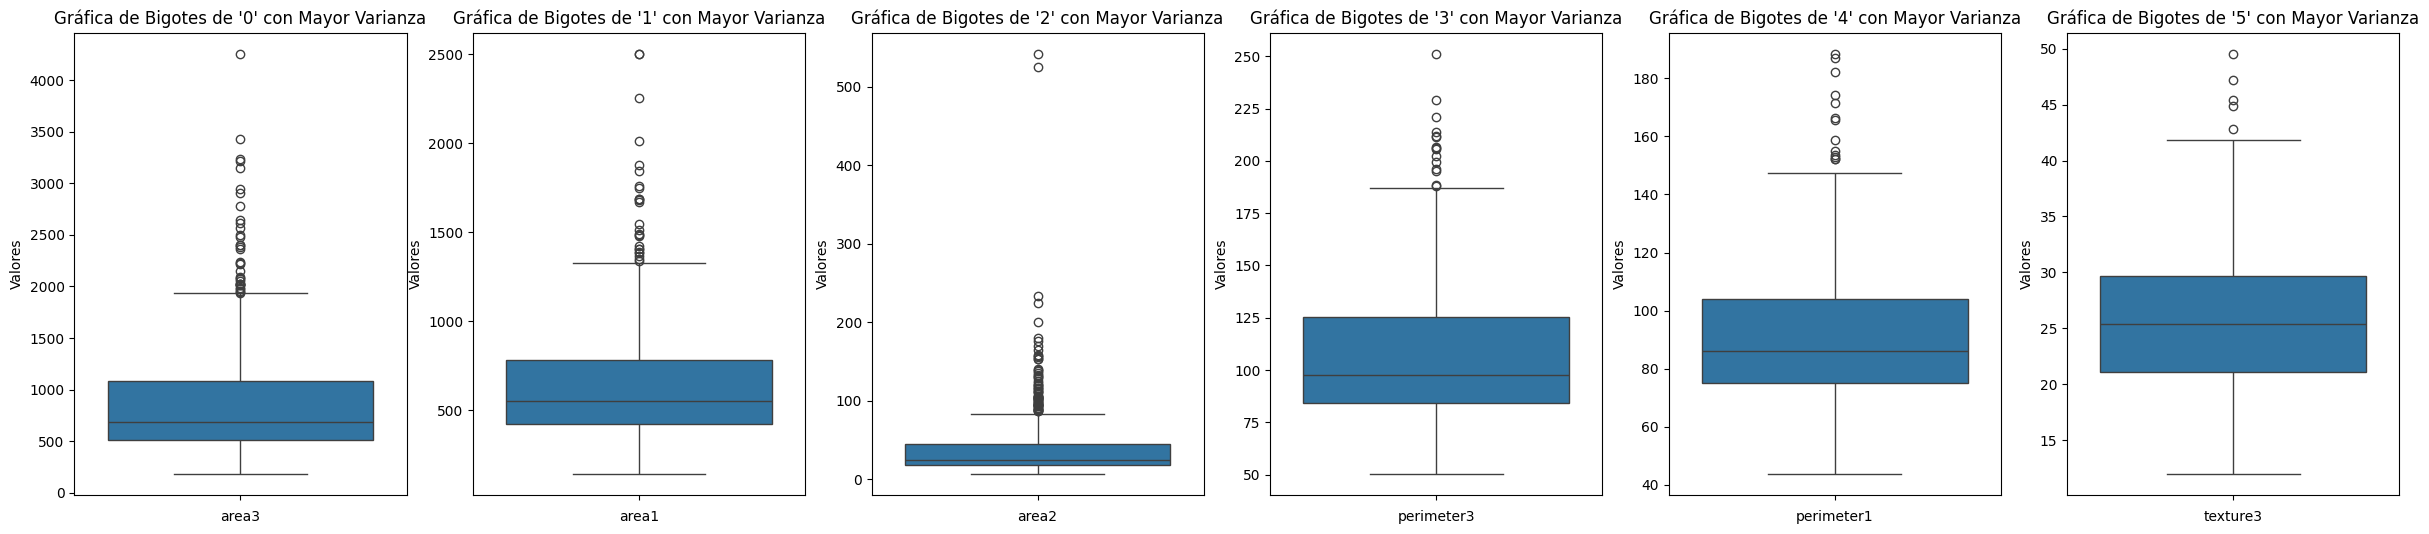

In [6]:
# Seleccionar las 6 dimensiones con mayor varianza
top_6_features = varianzas.nlargest(6).index
fig, axes = plt.subplots(1, len(top_6_features), figsize=(30,6))
# Visualización de las 6 características principales con gráficos de bigotes
for i,col in enumerate(top_6_features):

  sns.boxplot(X[col],ax=axes[i])
  axes[i].set_title(f"Gráfica de Bigotes de '{i}' con Mayor Varianza")
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Valores')
  axes[i].tick_params(axis='x', rotation=45)  # Rotar 45 grados (ajusta el ángulo si es necesario)



In [7]:
#estandarizar el conjunto de datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir a DataFrame para conservar las etiquetas de las columnas
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [8]:
#calcular la varianza de cada dimension
varianzas = X_scaled.var()
print(varianzas)

radius1               1.001761
texture1              1.001761
perimeter1            1.001761
area1                 1.001761
smoothness1           1.001761
compactness1          1.001761
concavity1            1.001761
concave_points1       1.001761
symmetry1             1.001761
fractal_dimension1    1.001761
radius2               1.001761
texture2              1.001761
perimeter2            1.001761
area2                 1.001761
smoothness2           1.001761
compactness2          1.001761
concavity2            1.001761
concave_points2       1.001761
symmetry2             1.001761
fractal_dimension2    1.001761
radius3               1.001761
texture3              1.001761
perimeter3            1.001761
area3                 1.001761
smoothness3           1.001761
compactness3          1.001761
concavity3            1.001761
concave_points3       1.001761
symmetry3             1.001761
fractal_dimension3    1.001761
dtype: float64


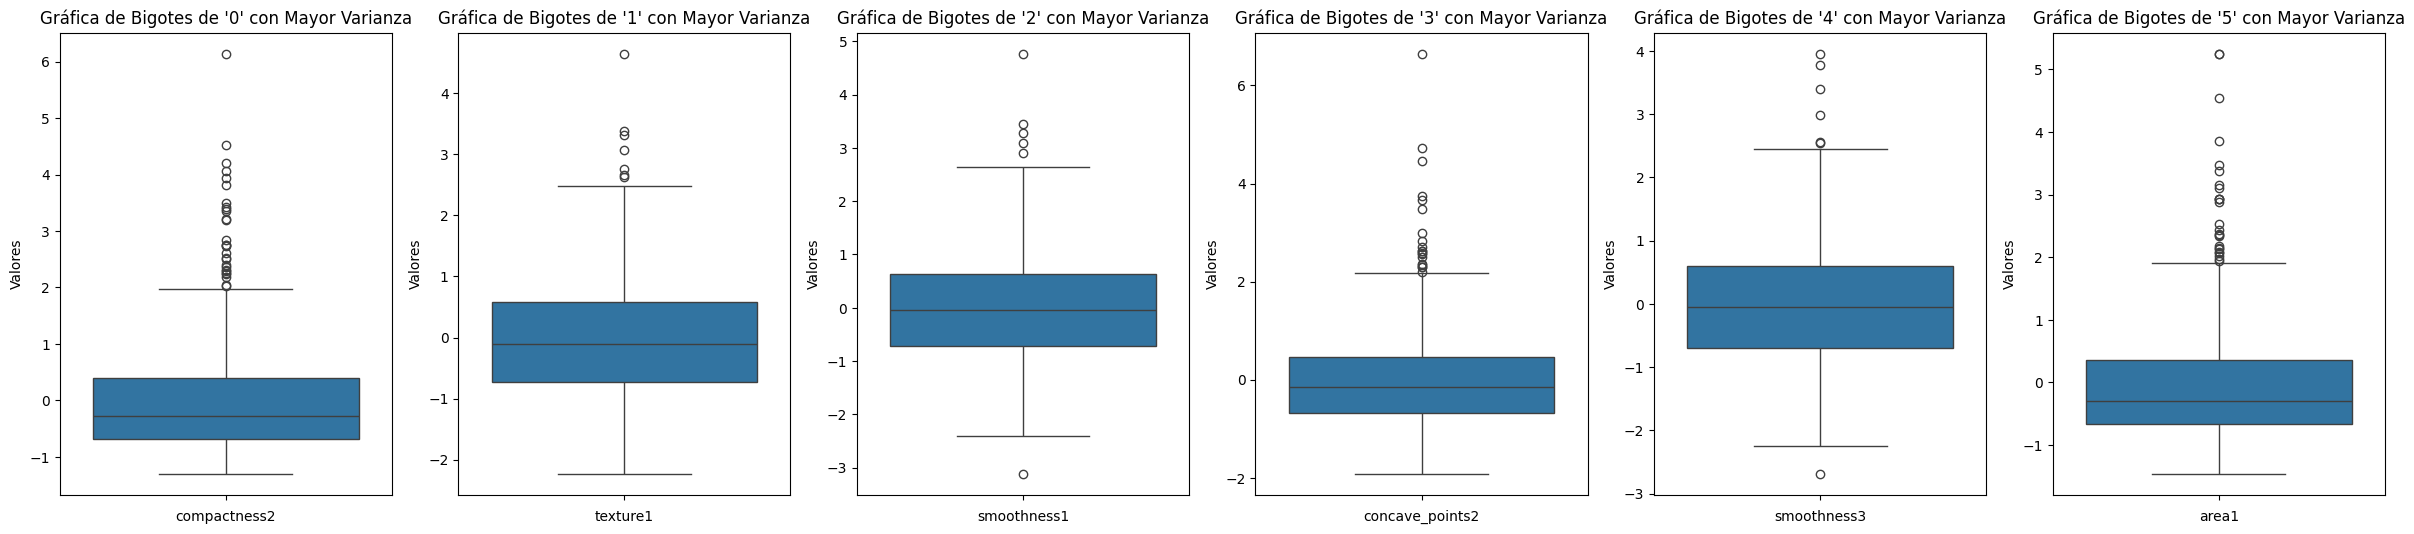

In [11]:
# Seleccionar las 6 dimensiones con mayor varianza
#varianza de los datos estandarizados
varianza_E=X_scaled.var()
top_6_features = varianza_E.nlargest(6).index

# Visualización de las 6 características principales con gráficos de bigotes
# Seleccionar las 6 dimensiones con mayor varianza
fig, axes = plt.subplots(1, len(top_6_features), figsize=(30,6))
# Visualización de las 6 características principales con gráficos de bigotes
for i,col in enumerate(top_6_features):

  sns.boxplot(X_scaled[col],ax=axes[i])
  axes[i].set_title(f"Gráfica de Bigotes de '{i}' con Mayor Varianza")
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Valores')
  axes[i].tick_params(axis='x', rotation=45)  # Rotar 45 grados (ajusta el ángulo si es necesario)



#2. Proyección de datos originales a nuevo espacio dimensional determinado con PCA

In [12]:
cov = X_scaled.cov()
eig_values, eig_vectors = np.linalg.eig(cov)
idx = np.argsort(eig_values, axis=0)[::-1]
sorted_eig_vectors = eig_vectors[:, idx]
ig_scores = np.dot(X_scaled, sorted_eig_vectors[:, :3])

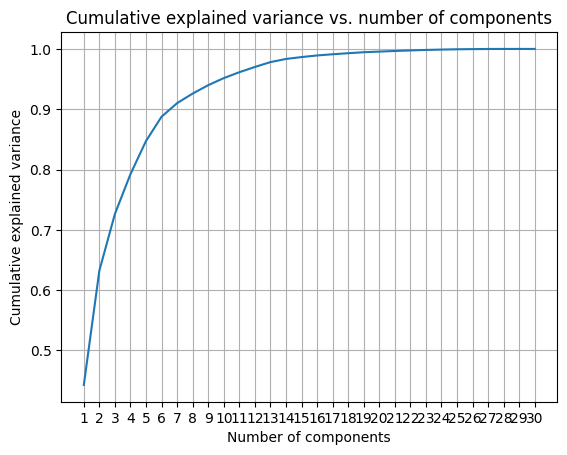

In [13]:
cumsum = np.cumsum(eig_values[idx]) / np.sum(eig_values[idx])
xint = range(1, len(cumsum) + 1)
plt.plot(xint, cumsum)

plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.xticks(xint)
plt.grid(visible=True)
plt.title("Cumulative explained variance vs. number of components")
plt.show()


In [9]:
from sklearn.decomposition import PCA
import time

start_time = time.time()

# Aplicar PCA para reducir a 3 dimensiones
pca = PCA(n_components=3)
data_pca = pca.fit_transform(X_scaled)

# Medir el tiempo de finalización
end_time = time.time()
execution_time = end_time - start_time

# Crear un DataFrame para los datos transformados
data_pca = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(data_pca.shape[1])])


In [10]:
print(f"Tiempo total requerido para la transformación a 3 dimensiones: {execution_time:.4f} segundos")

data_pca


Tiempo total requerido para la transformación a 3 dimensiones: 0.0228 segundos


,PC1,PC2,PC3
0,9.192837,1.948583,-1.123166
1,2.387802,-3.768172,-0.529293
2,5.733896,-1.075174,-0.551748
3,7.122953,10.275589,-3.232790
4,3.935302,-1.948072,1.389767
...,...,...,...
564,6.439315,-3.576817,2.459487
565,3.793382,-3.584048,2.088476
566,1.256179,-1.902297,0.562731
567,10.374794,1.672010,-1.877029


In [14]:
pca.components_[:,:10]

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547],
       [-0.00853124,  0.0645499 , -0.00931422,  0.02869953, -0.1042919 ,
        -0.07409157,  0.00273384, -0.02556354, -0.04023994, -0.02257409]])

In [16]:
# b) Presentación en formato de tabla de la varianza explicada por los primeros 10 componentes principales
pca_10 = PCA(n_components=10)
pca_10.fit(X_scaled)
explained_variance_df = pd.DataFrame({
    'Componente Principal': [f'PC{i+1}' for i in range(10)],
    'Varianza Explicada (%)': pca_10.explained_variance_ratio_ * 100
})

print("\nTabla de varianza explicada por los primeros 10 componentes principales:")
print(explained_variance_df)


Tabla de varianza explicada por los primeros 10 componentes principales:
  Componente Principal  Varianza Explicada (%)
0                  PC1               44.272026
1                  PC2               18.971182
2                  PC3                9.393163
3                  PC4                6.602135
4                  PC5                5.495768
5                  PC6                4.024522
6                  PC7                2.250734
7                  PC8                1.588724
8                  PC9                1.389649
9                 PC10                1.168978


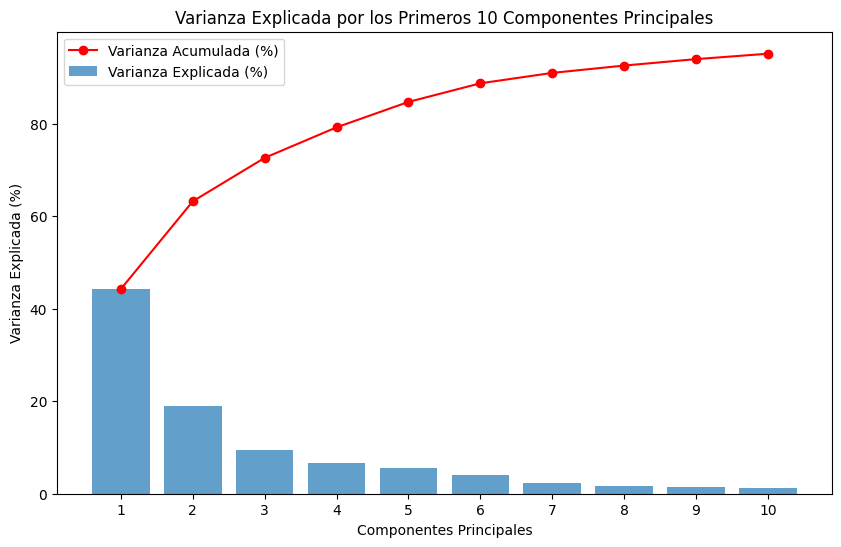

In [17]:
# c) Gráfica de barras de la varianza explicada por cada componente principal con línea de varianza acumulada
explained_variance_ratio = pca_10.explained_variance_ratio_ * 100
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), explained_variance_ratio, alpha=0.7, label='Varianza Explicada (%)')
plt.plot(range(1, 11), cumulative_variance, marker='o', color='r', label='Varianza Acumulada (%)')
plt.xlabel('Componentes Principales')
plt.ylabel('Varianza Explicada (%)')
plt.title('Varianza Explicada por los Primeros 10 Componentes Principales')
plt.xticks(range(1, 11))
plt.legend()
plt.show()

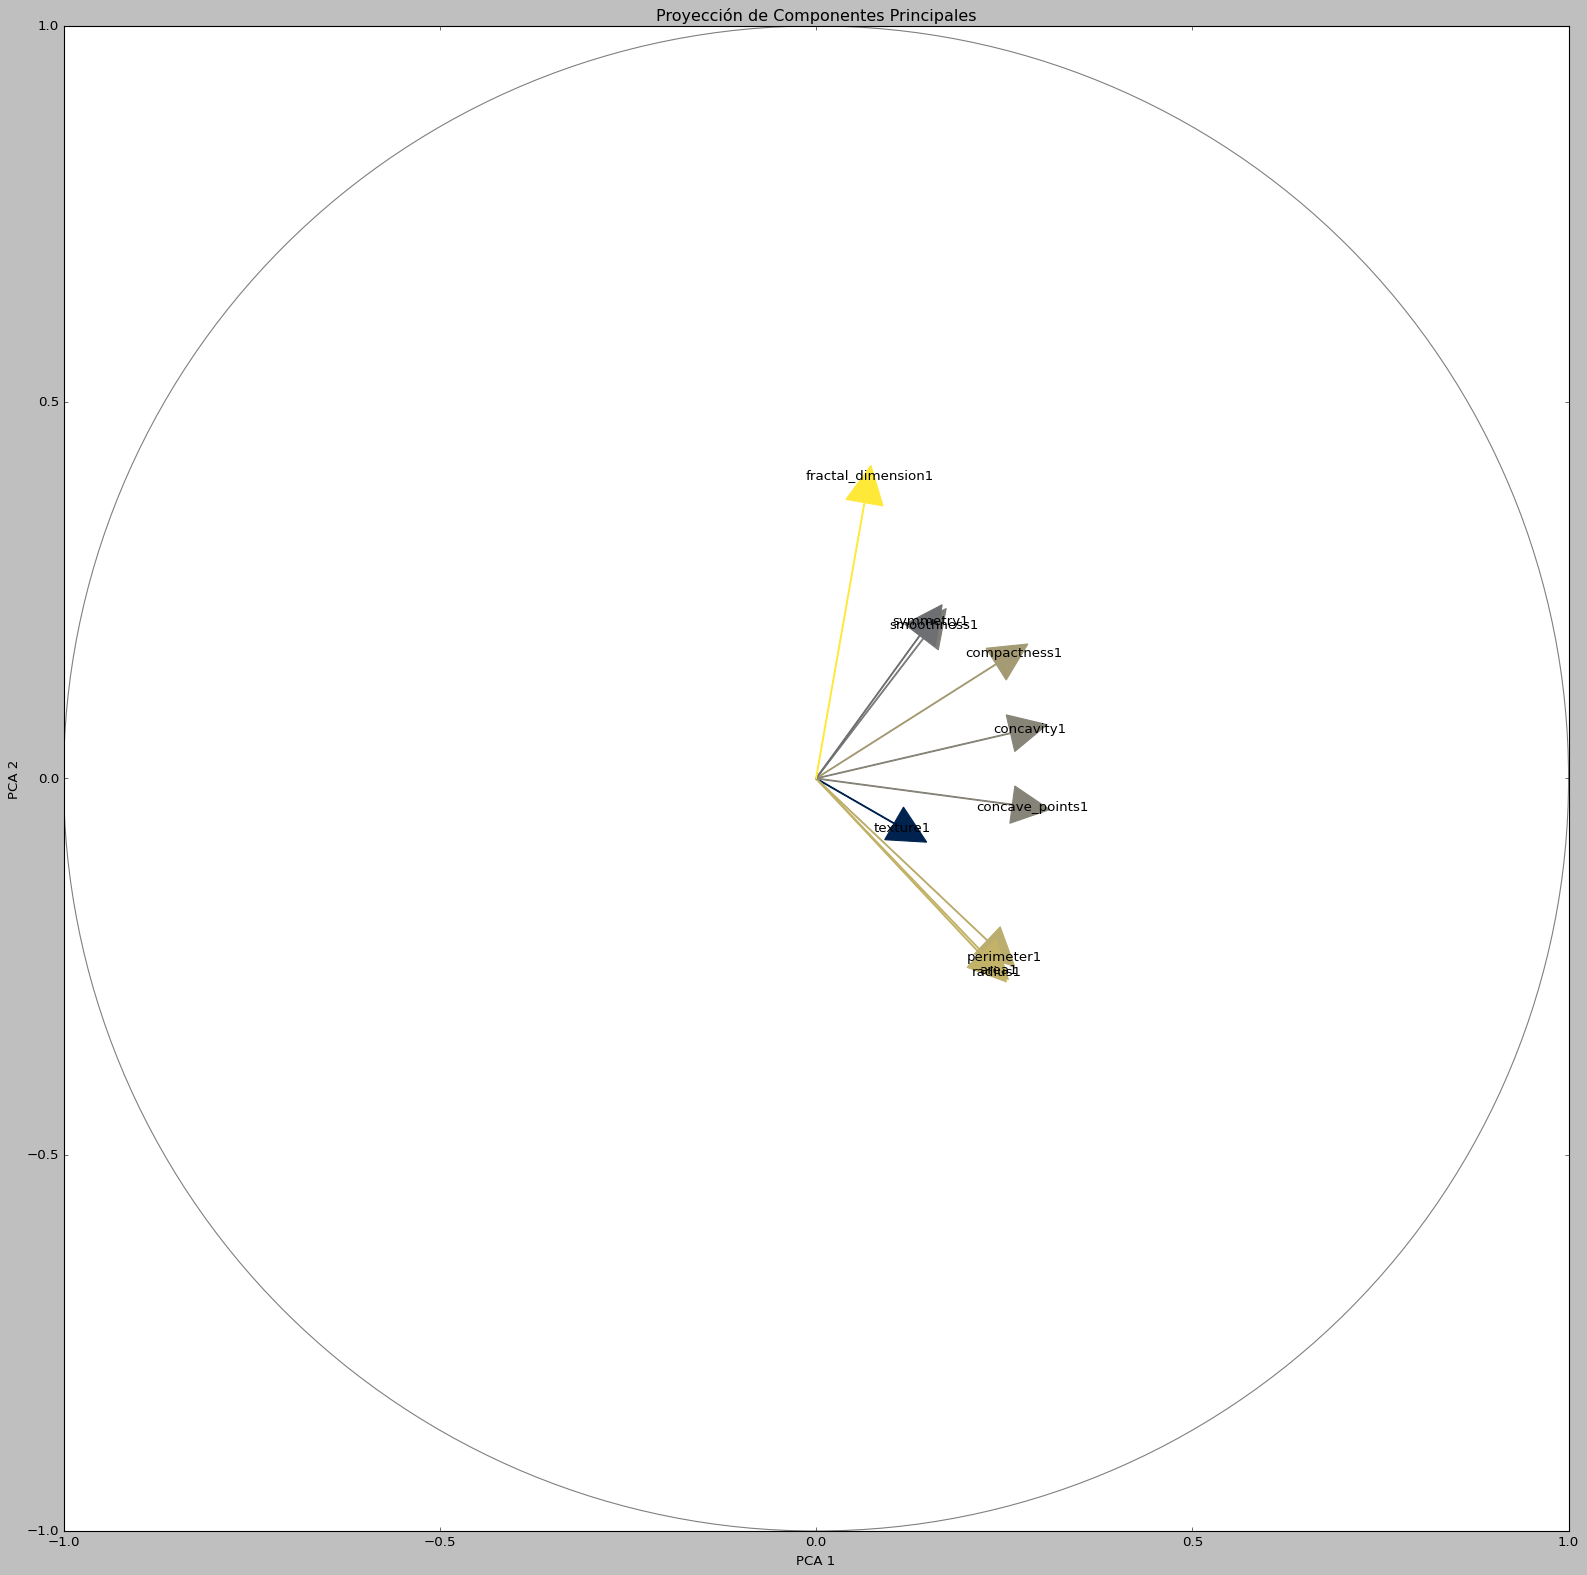

In [17]:
from matplotlib.patches import Circle
# Calcular la distancia euclidiana de cada característica en el espacio transformado
eucl_dist = np.sqrt(np.sum(pca.components_[:,:10]**2, axis=0))
# Crear los valores de las flechas basadas en las cargas de las características
ccircle = np.column_stack((pca.components_[0,:10], pca.components_[1,:10]))

# Gráfica de las componentes principales con flechas que indican la contribución de cada característica
with plt.style.context(('classic')):
    fig, axs = plt.subplots(figsize=(20, 20))
    for i, dist in enumerate(eucl_dist):
        # Calcular el color basado en la distancia euclidiana normalizada
        arrow_col = plt.cm.cividis((dist - eucl_dist.min()) / (eucl_dist.max() - eucl_dist.min()))

        # Dibujar la flecha desde el origen hasta el punto en el espacio PCA
        axs.arrow(0, 0,               # Origen de las flechas
                  ccircle[i][0],      # PC1
                  ccircle[i][1],      # PC2
                  lw=1,               # Ancho de línea
                  length_includes_head=False,
                  color=arrow_col,
                  fc=arrow_col,
                  head_width=0.05,
                  head_length=0.05)

        # Etiqueta para cada característica en la gráfica
        axs.text(ccircle[i][0] * 1.1, ccircle[i][1] * 1.1, features[i], ha='center', va='center')

    # Dibujar el círculo de unidad
    circle = Circle((0, 0), 1, facecolor='none', edgecolor='k', linewidth=1, alpha=0.5)
    axs.add_patch(circle)

    axs.set_xlabel("PCA 1")
    axs.set_ylabel("PCA 2")
    axs.set_title("Proyección de Componentes Principales")
    axs.set_aspect('equal', 'box')
    plt.tight_layout()
    plt.show()


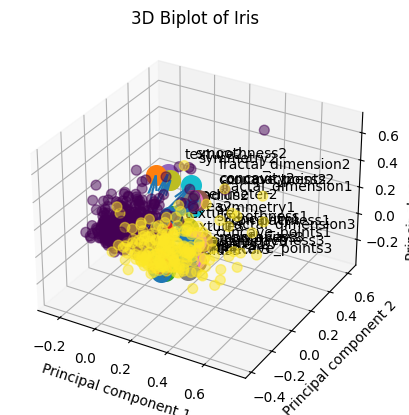

In [19]:
# e) Grafica en tres dimensiones para visualizar el nuevo espacio dimensional de PCA Initialize the 3D graph

# Create the scaled PCA dataframe
pca_df_scaled = data_pca.copy()

scaler_df = data_pca[['PC1', 'PC2', 'PC3']]
scaler = 1 / (scaler_df.max() - scaler_df.min())

for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define scaled features as arrays
xdata = pca_df_scaled['PC1']
ydata = pca_df_scaled['PC2']
zdata = pca_df_scaled['PC3']

# Plot 3D scatterplot of PCA
ax.scatter3D(
    xdata,
    ydata,
    zdata,
    c=y,
    cmap='viridis',
    s=50,
    alpha=0.5)

# Define the x, y, z variables
loadings = pca.components_
xs = loadings[0]
ys = loadings[1]
zs = loadings[2]

# Plot the loadings
for i, varnames in enumerate(features):
    ax.scatter(xs[i], ys[i], zs[i], s=200)
    ax.text(
        xs[i] + 0.1,
        ys[i] + 0.1,
        zs[i] + 0.1,
        varnames)

# Plot the arrows
x_arr = np.zeros(len(loadings[0]))
y_arr = z_arr = x_arr
ax.quiver(x_arr, y_arr, z_arr, xs, ys, zs)

# Plot title of graph
plt.title(f'3D Biplot of Iris')

# Plot x, y, z labels
ax.set_xlabel('Principal component 1', rotation=150)
ax.set_ylabel('Principal component 2')
ax.set_zlabel('Principal component 3', rotation=60)

plt.show()

Text(0.5, 0.92, 'Visualización en 3D del Espacio PCA')

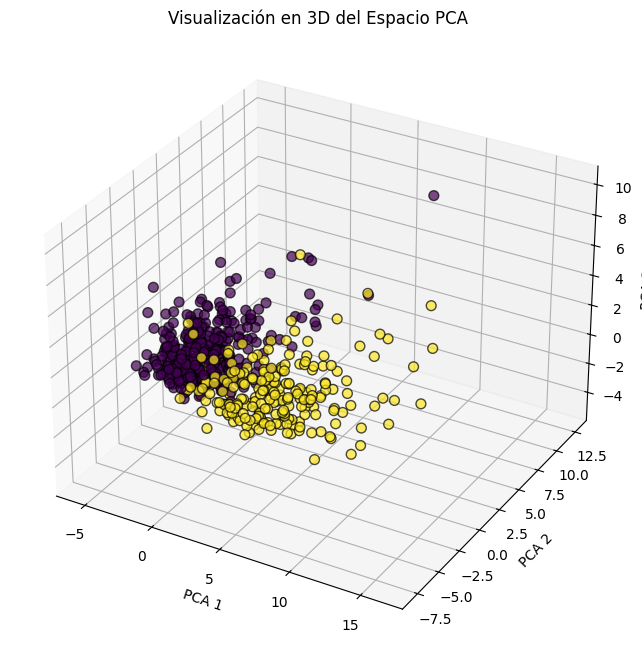

In [20]:


# Crear una gráfica 3D para visualizar el nuevo espacio dimensional de PCA
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Crear un scatter plot en 3D
scatter = ax.scatter(data_pca.iloc[:, 0], data_pca.iloc[:, 1], data_pca.iloc[:, 2],
                     c=y, cmap='viridis', s=50, edgecolor='k', alpha=0.7)



# Etiquetas y título de la gráfica
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title("Visualización en 3D del Espacio PCA")


# 3. Proyección de datos originales a nuevo espacio de tres dimensiones determinado con Sammon

In [18]:
def cmdscale(D):
    """
    Classical multidimensional scaling (MDS)

    Parameters
    ----------
    D : (n, n) array
        Symmetric distance matrix.

    Returns
    -------
    Y : (n, p) array
        Configuration matrix. Each column represents a dimension. Only the
        p dimensions corresponding to positive eigenvalues of B are returned.
        Note that each dimension is only determined up to an overall sign,
        corresponding to a reflection.

    e : (n,) array
        Eigenvalues of B.

    """
    # Number of points
    n = len(D)

    # Centering matrix
    H = np.eye(n) - np.ones((n, n))/n

    # YY^T
    B = -H.dot(D**2).dot(H)/2

    # Diagonalize
    evals, evecs = np.linalg.eigh(B)

    # Sort by eigenvalue in descending order
    idx   = np.argsort(evals)[::-1]
    evals = evals[idx]
    evecs = evecs[:,idx]

    # Compute the coordinates using positive-eigenvalued components only
    w, = np.where(evals > 0)
    L  = np.diag(np.sqrt(evals[w]))
    V  = evecs[:,w]
    Y  = V.dot(L)

    return Y, evals[evals > 0]

In [19]:
def sammon(x, n, display = 2, inputdist = 'raw', maxhalves = 20, maxiter = 500, tolfun = 1e-9, init = 'default'):

    import numpy as np
    from scipy.spatial.distance import cdist

    # Create distance matrix unless given by parameters
    if inputdist == 'distance':
        D = x
        if init == 'default':
            init = 'cmdscale'
    else:
        D = cdist(x, x)
        if init == 'default':
            init = 'pca'

    if inputdist == 'distance' and init == 'pca':
        raise ValueError("Cannot use init == 'pca' when inputdist == 'distance'")

    if np.count_nonzero(np.diagonal(D)) > 0:
        raise ValueError("The diagonal of the dissimilarity matrix must be zero")

    # Remaining initialisation
    N = x.shape[0]
    scale = 0.5 / D.sum()
    D = D + np.eye(N)

    if np.count_nonzero(D<=0) > 0:
        raise ValueError("Off-diagonal dissimilarities must be strictly positive")

    Dinv = 1 / D
    if init == 'pca':
        [UU,DD,_] = np.linalg.svd(x)
        y = UU[:,:n]*DD[:n]
    elif init == 'cmdscale':
        y,e = cmdscale(D)
        y = y[:,:n]
    else:
        y = np.random.normal(0.0,1.0,[N,n])
    one = np.ones([N,n])
    d = cdist(y,y) + np.eye(N)
    dinv = 1. / d
    delta = D-d
    E = ((delta**2)*Dinv).sum()

    # Get on with it
    for i in range(maxiter):

        # Compute gradient, Hessian and search direction (note it is actually
        # 1/4 of the gradient and Hessian, but the step size is just the ratio
        # of the gradient and the diagonal of the Hessian so it doesn't
        # matter).
        delta = dinv - Dinv
        deltaone = np.dot(delta,one)
        g = np.dot(delta,y) - (y * deltaone)
        dinv3 = dinv ** 3
        y2 = y ** 2
        H = np.dot(dinv3,y2) - deltaone - np.dot(2,y) * np.dot(dinv3,y) + y2 * np.dot(dinv3,one)
        s = -g.flatten(order='F') / np.abs(H.flatten(order='F'))
        y_old    = y

        # Use step-halving procedure to ensure progress is made
        for j in range(maxhalves):
            s_reshape = np.reshape(s, (-1,n),order='F')
            y = y_old + s_reshape
            d = cdist(y, y) + np.eye(N)
            dinv = 1 / d
            delta = D - d
            E_new = ((delta**2)*Dinv).sum()
            if E_new < E:
                break
            else:
                s = 0.5*s

        # Bomb out if too many halving steps are required
        if j == maxhalves-1:
            print('Warning: maxhalves exceeded. Sammon mapping may not converge...')

        # Evaluate termination criterion
        if abs((E - E_new) / E) < tolfun:
            if display:
                print('TolFun exceeded: Optimisation terminated')
            break

        # Report progress
        E = E_new
        if display > 1:
            print('epoch = %d : E = %12.10f'% (i+1, E * scale))

    if i == maxiter-1:
        print('Warning: maxiter exceeded. Sammon mapping may not have converged...')

    # Fiddle stress to match the original Sammon paper
    E = E * scale

    return [y,E]

In [20]:
 # ejecutar la proyeccion de Sammon

start_time = time.time()
[D_Sammon,E] = sammon(X, 3)
end_time = time.time()
execution_time = end_time - start_time



epoch = 1 : E = 0.0000336069
epoch = 2 : E = 0.0000333916
epoch = 3 : E = 0.0000331624
epoch = 4 : E = 0.0000325755
epoch = 5 : E = 0.0000321386
epoch = 6 : E = 0.0000320427
epoch = 7 : E = 0.0000312568
epoch = 8 : E = 0.0000307192
epoch = 9 : E = 0.0000255867
epoch = 10 : E = 0.0000239175
epoch = 11 : E = 0.0000174417
epoch = 12 : E = 0.0000098011
epoch = 13 : E = 0.0000071408
epoch = 14 : E = 0.0000066326
epoch = 15 : E = 0.0000062224
epoch = 16 : E = 0.0000060495
epoch = 17 : E = 0.0000059929
epoch = 18 : E = 0.0000058949
epoch = 19 : E = 0.0000058670
epoch = 20 : E = 0.0000057961
epoch = 21 : E = 0.0000057769
epoch = 22 : E = 0.0000057354
epoch = 23 : E = 0.0000057017
epoch = 24 : E = 0.0000056684
epoch = 25 : E = 0.0000056420
epoch = 26 : E = 0.0000055809
epoch = 27 : E = 0.0000055764
epoch = 28 : E = 0.0000055647
epoch = 29 : E = 0.0000055605
epoch = 30 : E = 0.0000055408
epoch = 31 : E = 0.0000055200
epoch = 32 : E = 0.0000055077
epoch = 33 : E = 0.0000054952
epoch = 34 : E = 0.

In [21]:
print(f"Tiempo total requerido para la transformación a 3 dimensiones: {execution_time:.4f} segundos")

Tiempo total requerido para la transformación a 3 dimensiones: 16.8871 segundos


Text(0.5, 0.92, 'Visualización en 3D del Espacio sammon')

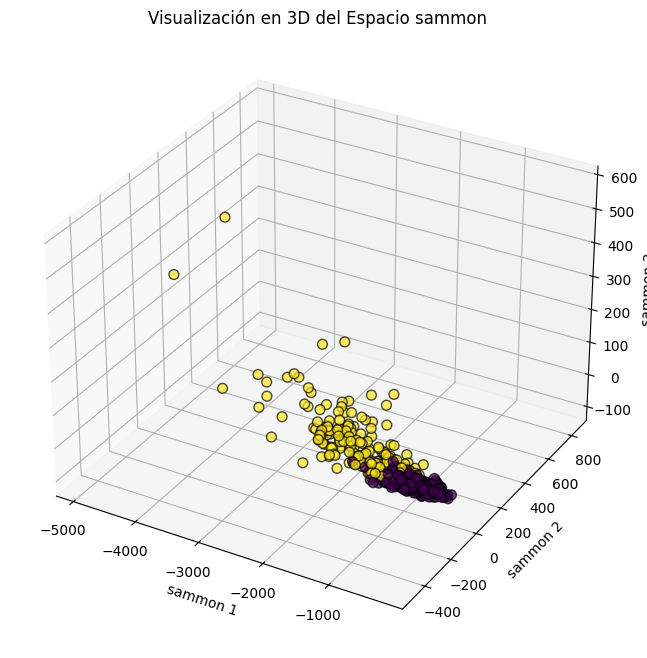

In [22]:
#grafica

# Crear una gráfica 3D para visualizar el nuevo espacio dimensional de PCA
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Crear un scatter plot en 3D
scatter = ax.scatter(D_Sammon[:, 0], D_Sammon[:, 1], D_Sammon[:, 2],
                     c=y, cmap='viridis', s=50, edgecolor='k', alpha=0.7)



# Etiquetas y título de la gráfica
ax.set_xlabel('sammon 1')
ax.set_ylabel('sammon 2')
ax.set_zlabel('sammon 3')
ax.set_title("Visualización en 3D del Espacio sammon")

In [23]:
 # Run the Sammon projection

start_time = time.time()
# Aplicar PCA para reducir a 3 dimensiones
pca = PCA(n_components=3)
Sammon_pca = pca.fit_transform(D_Sammon)
end_time = time.time()
execution_time = end_time - start_time
print(f"Tiempo total requerido para la transformación a 3 dimensiones: {execution_time:.4f} segundos")


Tiempo total requerido para la transformación a 3 dimensiones: 0.0048 segundos


In [27]:
Sammon_pca = pd.DataFrame(Sammon_pca, columns=[f'PC{i+1}' for i in range(Sammon_pca.shape[1])])
Sammon_pca

,PC1,PC2,PC3
0,-1160.133416,294.440875,55.679308
1,-1269.420846,-15.443512,-40.044806
2,-995.898791,-39.035721,-2.327459
3,406.802062,69.408005,7.771540
4,-930.312951,-190.175924,-0.085118
...,...,...,...
564,-1414.269207,-110.536889,38.277776
565,-1045.192476,-77.191500,0.637405
566,-314.621427,-47.849311,-8.271678
567,-1125.319394,-32.288640,-9.034427


Text(0.5, 0.92, 'Visualización en 3D del Espacio sammon PCA')

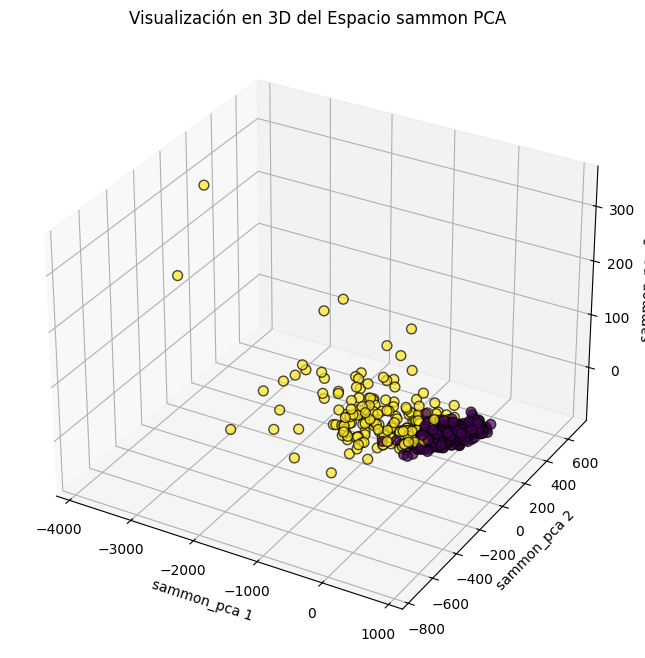

In [28]:
#grafica

# Crear una gráfica 3D para visualizar el nuevo espacio dimensional de PCA
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Crear un scatter plot en 3D
scatter = ax.scatter(Sammon_pca.iloc[:, 0], Sammon_pca.iloc[:, 1], Sammon_pca.iloc[:, 2],
                     c=y, cmap='viridis', s=50, edgecolor='k', alpha=0.7)



# Etiquetas y título de la gráfica
ax.set_xlabel('sammon_pca 1')
ax.set_ylabel('sammon_pca 2')
ax.set_zlabel('sammon_pca 3')
ax.set_title("Visualización en 3D del Espacio sammon PCA")

# 4. Proyección de datos originales a nuevo espacio de tres dimensiones determinado con autocodificadores

In [24]:
!pip install tensorflow

In [25]:
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense


In [26]:

# Definir el modelo de autocodificador
input_dim = 30  # Número de características originales
encoding_dim = 3  # Dimensión reducida deseada

# Definir la arquitectura
input_layer = Input(shape=(input_dim,))
encoder = Dense(64, activation='relu')(input_layer)  # Capa oculta de codificación
encoder = Dense(encoding_dim, activation='relu')(encoder)  # Capa de codificación a 3D

decoder = Dense(64, activation='relu')(encoder)  # Capa oculta de decodificación
decoder = Dense(input_dim, activation='linear')(decoder)  # Reconstrucción de los datos originales

# Crear el modelo completo de autocodificador
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Crear el modelo solo del codificador para obtener la proyección a 3D
encoder_model = Model(inputs=input_layer, outputs=encoder)

# Compilar y entrenar el modelo de autocodificador
autoencoder.compile(optimizer='adam', loss='mse')

In [27]:
start_time = time.time()
# Entrenar el autocodificador
model_history=autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=5, shuffle=True, verbose=1)
end_time = time.time()
execution_time = end_time - start_time

Epoch 1/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.9357
Epoch 2/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5811
Epoch 3/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4043
Epoch 4/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3479
Epoch 5/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3201
Epoch 6/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3158
Epoch 7/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3089
Epoch 8/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2827
Epoch 9/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2795
Epoch 10/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2695
Epoch 11/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2735
Epoch 12/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2724
Epoch 13/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2555
Epoch 14/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2442
Epoch 15/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 0

In [28]:
print(f"Tiempo total requerido para la transformación a 3 dimensiones: {execution_time:.4f} segundos")

Tiempo total requerido para la transformación a 3 dimensiones: 29.2883 segundos


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


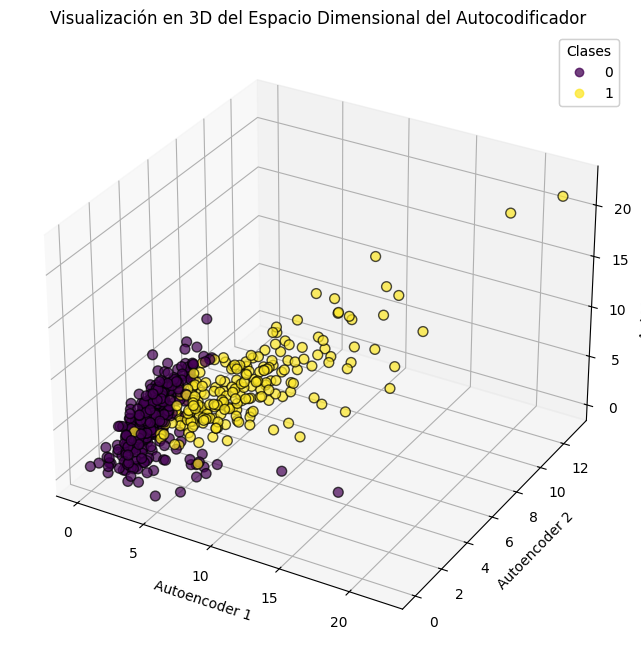

In [29]:
# Proyección de los datos al espacio reducido de 3D
X_encoded = encoder_model.predict(X_scaled)

# Visualización en 3D del nuevo espacio dimensional
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_encoded[:, 0], X_encoded[:, 1], X_encoded[:, 2],
                     c=y, cmap='viridis', s=50, edgecolor='k', alpha=0.7)

# Etiquetas y título de la gráfica
ax.set_xlabel('Autoencoder 1')
ax.set_ylabel('Autoencoder 2')
ax.set_zlabel('Autoencoder 3')
ax.set_title("Visualización en 3D del Espacio Dimensional del Autocodificador")

# Añadir leyenda para las clases
legend = ax.legend(*scatter.legend_elements(), title="Clases")
ax.add_artist(legend)

plt.show()

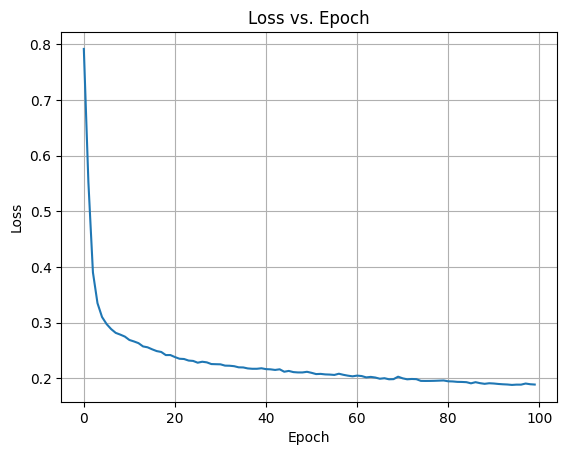

In [30]:

plt.plot(model_history.history["loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)